# **Data Security - Anomaly-based Intrusion Detection System using Neural Network**










---

Realized by: - Youssef Bentaleb || Ismail Lamaakal



# I. Getting CIC Dataset IDS 2017

Our data set is uploaded to Google Drive so the first step is connecting the notebook to Google Drive

In [ ]:
#drive.mount('/content/drive')

Mounted at /content/drive


Data is contained in 8 different CSV files, each containing different attack data at different times. So first thing we must do is merge all the data from files into one pandas DataFrame.

In [ ]:
import pandas as pd
import glob

In [ ]:
# Saving all .csv files in folder to list.
path = "/content/drive/MyDrive/Data Security/CICDataset__IDS_2017"
files = [file for file in glob.glob(path + "**/*.csv", recursive=True)]

In [ ]:
[print(f) for f in files]

/content/drive/MyDrive/Data Security/CICDataset__IDS_2017/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv
/content/drive/MyDrive/Data Security/CICDataset__IDS_2017/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv
/content/drive/MyDrive/Data Security/CICDataset__IDS_2017/Friday-WorkingHours-Morning.pcap_ISCX.csv
/content/drive/MyDrive/Data Security/CICDataset__IDS_2017/Monday-WorkingHours.pcap_ISCX.csv
/content/drive/MyDrive/Data Security/CICDataset__IDS_2017/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv
/content/drive/MyDrive/Data Security/CICDataset__IDS_2017/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv
/content/drive/MyDrive/Data Security/CICDataset__IDS_2017/Tuesday-WorkingHours.pcap_ISCX.csv
/content/drive/MyDrive/Data Security/CICDataset__IDS_2017/Wednesday-workingHours.pcap_ISCX.csv


[None, None, None, None, None, None, None, None]

In [ ]:
# Reading all the csv files into dataframes and putting thoose DFs to one list.

dataset = [pd.read_csv(f) for f in files]

In [ ]:
# Here we can see the number of rows and columns for each table.

for d in dataset:
    print(d.shape)

(225745, 79)
(286467, 79)
(191033, 79)
(529918, 79)
(288602, 79)
(170366, 79)
(445909, 79)
(692703, 79)


In [ ]:
# We already established that all tables have the same number of columns, but are they the same columns?
# This next piece of code loops over all given tables and compares each of them to all others.
for i in range(0,len(dataset)):
    if i != len(dataset)-1:
        same_columns = dataset[i].columns == dataset[i+1].columns
        
        if False in same_columns:
            print(i)
            break

same_columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True])

In [ ]:
# Combining all tables into one dataset. This is possilbe since all tables have the same columns,
# as we checked in the cell above.

dataset = pd.concat([d for d in dataset]).drop_duplicates(keep=False)
dataset.reset_index(drop=True, inplace = True)

In [ ]:
# By checking the shape of dataset we can confirm that concatenation has been successfull.

dataset.shape

(2427193, 79)

# II. Preliminary data analysis

Some general info about the dataset. It contains roughly 2.5 million records across 79 columns. Data consists of mostly int64 and float64 types, except 1 attributes of 'object' type.

Dataset contains of network traffic data during different attacks, represented with values like: port numbers, IP adressses, packet lenghts, SYN/ACK/FIN/.. flag counts, packet size and other...

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2427193 entries, 0 to 2427192
Data columns (total 79 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0    Destination Port             int64  
 1    Flow Duration                int64  
 2    Total Fwd Packets            int64  
 3    Total Backward Packets       int64  
 4   Total Length of Fwd Packets   int64  
 5    Total Length of Bwd Packets  int64  
 6    Fwd Packet Length Max        int64  
 7    Fwd Packet Length Min        int64  
 8    Fwd Packet Length Mean       float64
 9    Fwd Packet Length Std        float64
 10  Bwd Packet Length Max         int64  
 11   Bwd Packet Length Min        int64  
 12   Bwd Packet Length Mean       float64
 13   Bwd Packet Length Std        float64
 14  Flow Bytes/s                  float64
 15   Flow Packets/s               float64
 16   Flow IAT Mean                float64
 17   Flow IAT Std                 float64
 18   Flow IAT Max         

In [ ]:
dataset.describe()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,2.427193e+06,2.427193e+06,2.427193e+06,2.427193e+06,2.427193e+06,2.427193e+06,2.427193e+06,2.427193e+06,2.427193e+06,2.427193e+06,2.427193e+06,2.427193e+06,2.427193e+06,2.427193e+06,2.426859e+06,2.427193e+06,2.427193e+06,2.427193e+06,2.427193e+06,2.427193e+06,2.427193e+06,2.427193e+06,2.427193e+06,2.427193e+06,2.427193e+06,2.427193e+06,2.427193e+06,2.427193e+06,2.427193e+06,2.427193e+06,2.427193e+06,2427193.0,2.427193e+06,2427193.0,2.427193e+06,2.427193e+06,2.427193e+06,2.427193e+06,2.427193e+06,2.427193e+06,2.427193e+06,2.427193e+06,2.427193e+06,2.427193e+06,2.427193e+06,2.427193e+06,2.427193e+06,2.427193e+06,2.427193e+06,2.427193e+06,2.427193e+06,2.427193e+06,2.427193e+06,2.427193e+06,2.427193e+06,2.427193e+06,2427193.0,2427193.0,2427193.0,2427193.0,2427193.0,2427193.0,2.427193e+06,2.427193e+06,2.427193e+06,2.427193e+06,2.427193e+06,2.427193e+06,2.427193e+06,2.427193e+06,2.427193e+06,2.427193e+06,2.427193e+06,2.427193e+06,2.427193e+06,2.427193e+06,2.427193e+06,2.427193e+06
mean,8.887218e+03,1.722299e+07,1.061457e+01,1.197127e+01,6.337711e+02,1.884117e+04,2.393483e+02,1.916761e+01,6.516700e+01,8.029052e+01,1.010954e+03,4.320889e+01,3.521417e+02,3.910642e+02,inf,inf,1.493506e+06,3.404517e+06,1.068821e+07,1.686207e+05,1.687022e+07,3.023473e+06,3.810116e+06,1.052573e+07,1.171106e+06,1.153863e+07,2.105851e+06,1.733034e+06,5.463413e+06,1.127915e+06,4.971381e-02,0.0,1.730394e-05,0.0,-3.032809e+04,-2.654954e+03,4.007263e+04,6.097763e+03,1.672688e+01,1.103061e+03,1.968696e+02,3.424057e+02,5.667867e+05,3.311397e-02,4.971381e-02,2.826310e-04,2.931534e-01,3.183842e-01,1.039963e-01,1.730394e-05,2.838670e-04,6.950436e-01,2.191585e+02,6.516700e+01,3.521417e+02,-3.032809e+04,0.0,0.0,0.0,0.0,0.0,0.0,1.061457e+01,6.337589e+02,1.197127e+01,1.884077e+04,7.288617e+03,2.317396e+03,6.218988e+00,-3.202190e+03,9.511021e+04,4.797316e+04,1.786510e+05,6.798820e+04,9.696673e+06,5.876141e+05,1.013952e+07,9.234826e+06
std,1.925879e+04,3.574909e+07,8.095918e+02,1.077107e+03,1.078985e+04,2.443980e+06,7.696329e+02,6.151622e+01,1.989624e+02,3.021573e+02,2.068839e+03,7.131841e+01,6.417656e+02,8.947158e+02,NaN,NaN,4.715664e+06,8.593134e+06,2.608877e+07,2.992824e+06,3.568727e+07,1.016943e+07,1.030968e+07,2.617408e+07,9.204255e+06,3.072617e+07,9.563783e+06,6.748697e+06,1.841716e+07,8.962158e+06,2.173531e-01,0.0,4.159765e-03,0.0,2.273574e+07,1.568293e+06,1.920905e+05,3.756814e+04,2.559522e+01,2.152534e+03,3.227317e+02,6.705048e+02,1.766281e+06,1.789342e-01,2.173531e-01,1.680926e-02,4.552083e-01,4.658496e-01,3.052558e-01,4.159765e-03,1.684597e-02,7.037020e-01,3.502193e+02,1.989624e+02,6.417656e+02,2.273574e+07,0.0,0.0,0.0,0.0,0.0,0.0,8.095918e+02,1.077525e+04,1.077107e+03,2.44394

mean premier quantile
25% deuxiem quatile
50% median
75% troisiem quantile

Upon further inspection we can see that dataset contains 14 labels. Labels represent network/web attacks and BENIGN state which is the network traffic during normal business day.

In [ ]:
# Dataset conatains 14 labels.
print(dataset[' Label'].unique())
len(dataset[' Label'].unique())

['BENIGN' 'DDoS' 'PortScan' 'Bot' 'Infiltration'
 'Web Attack � Brute Force' 'Web Attack � XSS'
 'Web Attack � Sql Injection' 'FTP-Patator' 'SSH-Patator' 'DoS slowloris'
 'DoS Slowhttptest' 'DoS Hulk' 'DoS GoldenEye' 'Heartbleed']


15

In [ ]:
dataset.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,0,0,0.0,0.0,4.000000e+06,666666.66670,3.0,0.0,3,3,3,3.0,0.0,3,3,0,0.0,0.0,0,0,0,0,0,0,40,0,666666.666700,0.000000,6,6,6.0,0.0,0.0,0,0,0,0,1,0,0,0,0,9.0,6.0,0.0,40,0,0,0,0,0,0,2,12,0,0,33,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,6,6,6.0,0.0,1.100917e+05,18348.62385,109.0,0.0,109,109,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,9174.311927,9174.311927,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,0,1,9.0,6.0,6.0,20,0,0,0,0,0,0,1,6,1,6,29,256,0,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,6,6,6.0,0.0,2.307692e+05,38461.53846,52.0,0.0,52,52,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,19230.769230,19230.769230,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,0,1,9.0,6.0,6.0,20,0,0,0,0,0,0,1,6,1,6,29,256,0,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.0,6,6,6.0,0.0,3.529412e+05,58823.52941,34.0,0.0,34,34,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,29411.764710,29411.764710,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,0,1,9.0,6.0,6.0,20,0,0,0,0,0,0,1,6,1,6,31,329,0,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.0,0,0,0.0,0.0,4.000000e+06,666666.66670,3.0,0.0,3,3,3,3.0,0.0,3,3,0,0.0,0.0,0,0,0,0,0,0,40,0,666666.666700,0.000000,6,6,6.0,0.0,0.0,0,0,0,0,1,0,0,0,0,9.0,6.0,0.0,40,0,0,0,0,0,0,2,12,0,0,32,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

Most records in the dataset are of DDos and DOS Hulk attacks. This might pose a problem later in model training, considering that there is a very small amount of data for most attacks. Model selection will be greatly influenced by this information.

In [ ]:
data = dataset[' Label'].where(dataset[' Label'] != "BENIGN")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text major ticklabel objects>)

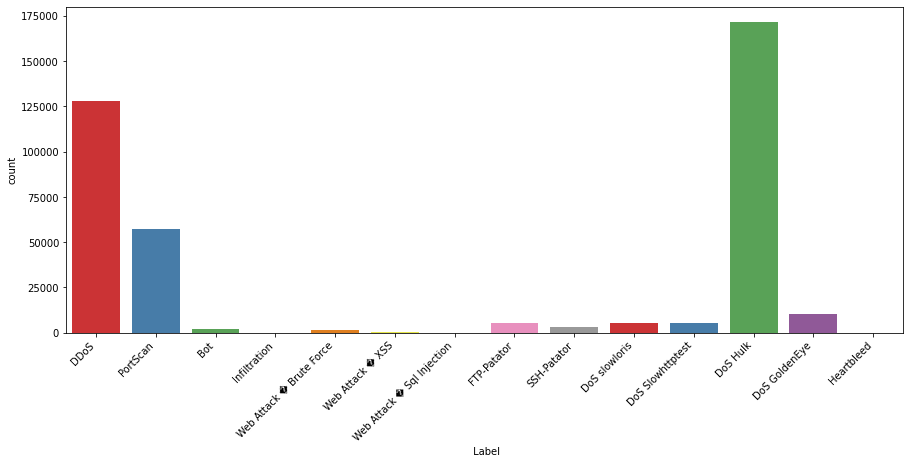

In [ ]:
plt.figure(figsize=(15,6))
chart = sns.countplot(data, palette="Set1")
plt.xticks(rotation=45, horizontalalignment="right")

# III. Data Cleaning

This chapter contains data cleaning code. We go through the process of **renaming columns**, **removing NaN** and **non-finite values** (-inf, inf) to get the data ready for model training.

## 1. Renaming columns

In [ ]:
# Removing whitespaces in column names.

col_names = [col.replace(' ', '') for col in dataset.columns]
dataset.columns = col_names
dataset.head()

,DestinationPort,FlowDuration,TotalFwdPackets,TotalBackwardPackets,TotalLengthofFwdPackets,TotalLengthofBwdPackets,FwdPacketLengthMax,FwdPacketLengthMin,FwdPacketLengthMean,FwdPacketLengthStd,BwdPacketLengthMax,BwdPacketLengthMin,BwdPacketLengthMean,BwdPacketLengthStd,FlowBytes/s,FlowPackets/s,FlowIATMean,FlowIATStd,FlowIATMax,FlowIATMin,FwdIATTotal,FwdIATMean,FwdIATStd,FwdIATMax,FwdIATMin,BwdIATTotal,BwdIATMean,BwdIATStd,BwdIATMax,BwdIATMin,FwdPSHFlags,BwdPSHFlags,FwdURGFlags,BwdURGFlags,FwdHeaderLength,BwdHeaderLength,FwdPackets/s,BwdPackets/s,MinPacketLength,MaxPacketLength,PacketLengthMean,PacketLengthStd,PacketLengthVariance,FINFlagCount,SYNFlagCount,RSTFlagCount,PSHFlagCount,ACKFlagCount,URGFlagCount,CWEFlagCount,ECEFlagCount,Down/UpRatio,AveragePacketSize,AvgFwdSegmentSize,AvgBwdSegmentSize,FwdHeaderLength.1,FwdAvgBytes/Bulk,FwdAvgPackets/Bulk,FwdAvgBulkRate,BwdAvgBytes/Bulk,BwdAvgPackets/Bulk,BwdAvgBulkRate,SubflowFwdPackets,SubflowFwdBytes,SubflowBwdPackets,SubflowBwdBytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,ActiveMean,ActiveStd,ActiveMax,ActiveMin,IdleMean,IdleStd,IdleMax,IdleMin,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,0,0,0.0,0.0,4.000000e+06,666666.66670,3.0,0.0,3,3,3,3.0,0.0,3,3,0,0.0,0.0,0,0,0,0,0,0,40,0,666666.666700,0.000000,6,6,6.0,0.0,0.0,0,0,0,0,1,0,0,0,0,9.0,6.0,0.0,40,0,0,0,0,0,0,2,12,0,0,33,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,6,6,6.0,0.0,1.100917e+05,18348.62385,109.0,0.0,109,109,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,9174.311927,9174.311927,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,0,1,9.0,6.0,6.0,20,0,0,0,0,0,0,1,6,1,6,29,256,0,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,6,6,6.0,0.0,2.307692e+05,38461.53846,52.0,0.0,52,52,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,19230.769230,19230.769230,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,0,1,9.0,6.0,6.0,20,0,0,0,0,0,0,1,6,1,6,29,256,0,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.0,6,6,6.0,0.0,3.529412e+05,58823.52941,34.0,0.0,34,34,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,29411.764710,29411.764710,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,0,1,9.0,6.0,6.0,20,0,0,0,0,0,0,1,6,1,6,31,329,0,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.0,0,0,0.0,0.0,4.000000e+06,666666.66670,3.0,0.0,3,3,3,3.0,0.0,3,3,0,0.0,0.0,0,0,0,0,0,0,40,0,666666.666700,0.000000,6,6,6.0,0.0,0.0,0,0,0,0,1,0,0,0,0,9.0,6.0,0.0,40,0,0,0,0,0,0,2,12,0,0,32,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [ ]:
# Here we can see that 'Label' column contains some wierd characters. 

dataset["Label"].unique()

array(['BENIGN', 'DDoS', 'PortScan', 'Bot', 'Infiltration',
       'Web Attack � Brute Force', 'Web Attack � XSS',
       'Web Attack � Sql Injection', 'FTP-Patator', 'SSH-Patator',
       'DoS slowloris', 'DoS Slowhttptest', 'DoS Hulk', 'DoS GoldenEye',
       'Heartbleed'], dtype=object)

In [ ]:
# This next snippet uses regular expressions to replace wierd characters with dunders.

label_names = dataset['Label'].unique()


import re

label_names = [re.sub("[^a-zA-Z ]+", " ", str(l)) for l in label_names]
label_names = [re.sub("[\s\s]", '_', l) for l in label_names]
label_names = [lab.replace("__", "_") for lab in label_names]

label_names, len(label_names)

(['BENIGN',
  'DDoS',
  'PortScan',
  'Bot',
  'Infiltration',
  'Web_Attack__Brute_Force',
  'Web_Attack__XSS',
  'Web_Attack__Sql_Injection',
  'FTP_Patator',
  'SSH_Patator',
  'DoS_slowloris',
  'DoS_Slowhttptest',
  'DoS_Hulk',
  'DoS_GoldenEye',
  'Heartbleed'],
 15)

In [ ]:
# Replacing 'Label' column values with new readable values.

labels = dataset['Label'].unique()

for i in range(0,len(label_names)):
    dataset['Label'] = dataset['Label'].replace({labels[i] : label_names[i]})
    
dataset['Label'].unique()

array(['BENIGN', 'DDoS', 'PortScan', 'Bot', 'Infiltration',
       'Web_Attack__Brute_Force', 'Web_Attack__XSS',
       'Web_Attack__Sql_Injection', 'FTP_Patator', 'SSH_Patator',
       'DoS_slowloris', 'DoS_Slowhttptest', 'DoS_Hulk', 'DoS_GoldenEye',
       'Heartbleed'], dtype=object)

In [ ]:
len(dataset['Label'].unique())

15

In [ ]:
# Saving cleaned dataset.

dataset.to_csv("/content/drive/MyDrive/Data Security/Dataset_clean.csv", index=False)

## 2. Removing NAN(NULL) values

In [ ]:
# Checking if there are any NULL values in the dataset.

dataset.isnull().values.any()

True

In [ ]:
# Checking which column/s contain NULL values.

[col for col in dataset if dataset[col].isnull().values.any()]

['FlowBytes/s']

In [ ]:
# Checking how many NULL values it this column contains.

dataset['FlowBytes/s'].isnull().sum()

334

In [ ]:
# Considering that only 334 rows contain NULL vlaues in the entire dataset, which makes about 0.014%, we
# can safely remove all NULL rows without spoiling the data.

334/dataset.shape[0]*100

0.013760751617197316

In [ ]:
# Removing rows that contain NULL values and checking if number of removed rows is equal to the number of null values.

before = dataset.shape

dataset.dropna(inplace=True)

after = dataset.shape

before[0] - after[0]

334

In [ ]:
dataset.isnull().any().any()

False

## 3. Removing *non-finite* values

In [ ]:
import numpy as np

In [ ]:
labl = dataset['Label']
dataset = dataset.loc[:, dataset.columns != 'Label'].astype('float64')

In [ ]:
# Checking if all values are finite.

np.all(np.isfinite(dataset))

False

In [ ]:
# Checking what column/s contain non-finite values.

nonfinite = [col for col in dataset if not np.all(np.isfinite(dataset[col]))]

nonfinite

['FlowBytes/s', 'FlowPackets/s']

In [ ]:
# Checking how many non-finite values each column contains.

finite = np.isfinite(dataset['FlowBytes/s']).sum()

dataset.shape[0] - finite

1132

In [ ]:
# Checking how many non-finite values each column contains.

finite = np.isfinite(dataset['FlowPackets/s']).sum()

dataset.shape[0] - finite

1132

In [ ]:
# Same as before, since there is a small number of non-finite values we can safely remove them from the dataset
# without spoiling the dataset.

# Replacing infinite values with NaN values.
dataset = dataset.replace([np.inf, -np.inf], np.nan)

In [ ]:
# We can see that now we have Nan values again.

np.any(np.isnan(dataset))

True

In [ ]:
# Bringing the Labels back into the dataset before deliting Nan rows.

dataset = dataset.merge(labl, how='outer', left_index=True, right_index=True)

In [ ]:
# Removing new NaN values.

dataset.dropna(inplace=True)

In [ ]:
dataset.shape

(2425727, 79)

In [ ]:
dataset.head()

,DestinationPort,FlowDuration,TotalFwdPackets,TotalBackwardPackets,TotalLengthofFwdPackets,TotalLengthofBwdPackets,FwdPacketLengthMax,FwdPacketLengthMin,FwdPacketLengthMean,FwdPacketLengthStd,BwdPacketLengthMax,BwdPacketLengthMin,BwdPacketLengthMean,BwdPacketLengthStd,FlowBytes/s,FlowPackets/s,FlowIATMean,FlowIATStd,FlowIATMax,FlowIATMin,FwdIATTotal,FwdIATMean,FwdIATStd,FwdIATMax,FwdIATMin,BwdIATTotal,BwdIATMean,BwdIATStd,BwdIATMax,BwdIATMin,FwdPSHFlags,BwdPSHFlags,FwdURGFlags,BwdURGFlags,FwdHeaderLength,BwdHeaderLength,FwdPackets/s,BwdPackets/s,MinPacketLength,MaxPacketLength,PacketLengthMean,PacketLengthStd,PacketLengthVariance,FINFlagCount,SYNFlagCount,RSTFlagCount,PSHFlagCount,ACKFlagCount,URGFlagCount,CWEFlagCount,ECEFlagCount,Down/UpRatio,AveragePacketSize,AvgFwdSegmentSize,AvgBwdSegmentSize,FwdHeaderLength.1,FwdAvgBytes/Bulk,FwdAvgPackets/Bulk,FwdAvgBulkRate,BwdAvgBytes/Bulk,BwdAvgPackets/Bulk,BwdAvgBulkRate,SubflowFwdPackets,SubflowFwdBytes,SubflowBwdPackets,SubflowBwdBytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,ActiveMean,ActiveStd,ActiveMax,ActiveMin,IdleMean,IdleStd,IdleMax,IdleMin,Label
0,54865.0,3.0,2.0,0.0,12.0,0.0,6.0,6.0,6.0,0.0,0.0,0.0,0.0,0.0,4.000000e+06,666666.66670,3.0,0.0,3.0,3.0,3.0,3.0,0.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40.0,0.0,666666.666700,0.000000,6.0,6.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,9.0,6.0,0.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,12.0,0.0,0.0,33.0,-1.0,1.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
1,55054.0,109.0,1.0,1.0,6.0,6.0,6.0,6.0,6.0,0.0,6.0,6.0,6.0,0.0,1.100917e+05,18348.62385,109.0,0.0,109.0,109.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,20.0,9174.311927,9174.311927,6.0,6.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,9.0,6.0,6.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,6.0,1.0,6.0,29.0,256.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
2,55055.0,52.0,1.0,1.0,6.0,6.0,6.0,6.0,6.0,0.0,6.0,6.0,6.0,0.0,2.307692e+05,38461.53846,52.0,0.0,52.0,52.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,20.0,19230.769230,19230.769230,6.0,6.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,9.0,6.0,6.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,6.0,1.0,6.0,29.0,256.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
3,46236.0,34.0,1.0,1.0,6.0,6.0,6.0,6.0,6.0,0.0,6.0,6.0,6.0,0.0,3.529412e+05,58823.52941,34.0,0.0,34.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,20.0,29411.764710,29411.764710,6.0,6.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,9.0,6.0,6.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,6.0,1.0,6.0,31.0,329.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
4,54863.0,3.0,2.0,0.0,12.0,0.0,6.0,6.0,6.0,0.0,0.0,0.0,0.0,0.0,4.000000e+06,666666.66670,3.0,0.0,3.0,3.0,3.0,3.0,0.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40.0,0.0,666666.666700,0.000000,6.0,6.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,9.0,6.0,0.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,12.0,0.0,0.0,32.0,-1.0,1.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN


In [ ]:
# Saving cleaned dataset.

dataset.to_csv("/content/drive/MyDrive/Data Security/Dataset_clean_dropna.csv", index=False)

# IV. Data preparation

In this chapter, final data preparation steps are taken before we use the data for model **traning** and **testing**.

These steps include:

* Data scaling
* Label encoding
* Data splitting

## 1. Scaling the data

In [ ]:
# Splitting dataset into features and labels.

labels = dataset['Label']
features = dataset.loc[:, dataset.columns != 'Label'].astype('float64')

In [ ]:
features.head()

,DestinationPort,FlowDuration,TotalFwdPackets,TotalBackwardPackets,TotalLengthofFwdPackets,TotalLengthofBwdPackets,FwdPacketLengthMax,FwdPacketLengthMin,FwdPacketLengthMean,FwdPacketLengthStd,BwdPacketLengthMax,BwdPacketLengthMin,BwdPacketLengthMean,BwdPacketLengthStd,FlowBytes/s,FlowPackets/s,FlowIATMean,FlowIATStd,FlowIATMax,FlowIATMin,FwdIATTotal,FwdIATMean,FwdIATStd,FwdIATMax,FwdIATMin,BwdIATTotal,BwdIATMean,BwdIATStd,BwdIATMax,BwdIATMin,FwdPSHFlags,BwdPSHFlags,FwdURGFlags,BwdURGFlags,FwdHeaderLength,BwdHeaderLength,FwdPackets/s,BwdPackets/s,MinPacketLength,MaxPacketLength,PacketLengthMean,PacketLengthStd,PacketLengthVariance,FINFlagCount,SYNFlagCount,RSTFlagCount,PSHFlagCount,ACKFlagCount,URGFlagCount,CWEFlagCount,ECEFlagCount,Down/UpRatio,AveragePacketSize,AvgFwdSegmentSize,AvgBwdSegmentSize,FwdHeaderLength.1,FwdAvgBytes/Bulk,FwdAvgPackets/Bulk,FwdAvgBulkRate,BwdAvgBytes/Bulk,BwdAvgPackets/Bulk,BwdAvgBulkRate,SubflowFwdPackets,SubflowFwdBytes,SubflowBwdPackets,SubflowBwdBytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,ActiveMean,ActiveStd,ActiveMax,ActiveMin,IdleMean,IdleStd,IdleMax,IdleMin
0,54865.0,3.0,2.0,0.0,12.0,0.0,6.0,6.0,6.0,0.0,0.0,0.0,0.0,0.0,4.000000e+06,666666.66670,3.0,0.0,3.0,3.0,3.0,3.0,0.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40.0,0.0,666666.666700,0.000000,6.0,6.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,9.0,6.0,0.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,12.0,0.0,0.0,33.0,-1.0,1.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,55054.0,109.0,1.0,1.0,6.0,6.0,6.0,6.0,6.0,0.0,6.0,6.0,6.0,0.0,1.100917e+05,18348.62385,109.0,0.0,109.0,109.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,20.0,9174.311927,9174.311927,6.0,6.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,9.0,6.0,6.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,6.0,1.0,6.0,29.0,256.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,55055.0,52.0,1.0,1.0,6.0,6.0,6.0,6.0,6.0,0.0,6.0,6.0,6.0,0.0,2.307692e+05,38461.53846,52.0,0.0,52.0,52.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,20.0,19230.769230,19230.769230,6.0,6.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,9.0,6.0,6.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,6.0,1.0,6.0,29.0,256.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,46236.0,34.0,1.0,1.0,6.0,6.0,6.0,6.0,6.0,0.0,6.0,6.0,6.0,0.0,3.529412e+05,58823.52941,34.0,0.0,34.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,20.0,29411.764710,29411.764710,6.0,6.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,9.0,6.0,6.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,6.0,1.0,6.0,31.0,329.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,54863.0,3.0,2.0,0.0,12.0,0.0,6.0,6.0,6.0,0.0,0.0,0.0,0.0,0.0,4.000000e+06,666666.66670,3.0,0.0,3.0,3.0,3.0,3.0,0.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40.0,0.0,666666.666700,0.000000,6.0,6.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,9.0,6.0,0.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,12.0,0.0,0.0,32.0,-1.0,1.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# For scaling the data, we use RobustScaler class from sklearn.

from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

For scaling the data we used RobustScaler class from sklearn. RobustScaler is used to perserve outliers in the data.

In [ ]:
scaler = RobustScaler()
scaler.fit(features)

features = scaler.transform(features)

In [ ]:
# Checking if scaling has been succesful.
features[0]

array([ 1.40474359e+02, -1.08800488e-02,  0.00000000e+00, -5.00000000e-01,
       -1.73374613e-01, -1.01886792e-01, -1.57657658e-01,  1.08108108e-01,
       -6.59574468e-01,  0.00000000e+00, -1.11356119e-01,  0.00000000e+00,
       -4.00833491e-01,  0.00000000e+00,  6.24025254e+01,  4.40008275e+01,
       -3.54918620e-02, -8.36254323e-03, -9.42871935e-03, -1.47058824e-02,
       -8.75642074e-06, -5.47273279e-05,  0.00000000e+00, -9.27606653e-06,
        0.00000000e+00, -1.75808720e-05, -9.01237850e-05,  0.00000000e+00,
       -2.23633599e-05, -6.38297872e-02,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -2.14285714e-01, -3.57142857e-01,
        7.96727544e+01, -8.97344275e-02,  1.08108108e-01, -7.19629498e-02,
       -3.65960885e-01, -9.30566480e-02, -8.52278784e-03,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  1.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -1.00000000e+00,
       -4.14028384e-01, -

## 2. Label encoding

Label encoding is done when dataset contains categorical values. It is used to turn categorical values into numerical values by replacing data categories with integers starting with 0.

In [ ]:
# No need to do previous operations, just load clean saved dataset.

dataset = pd.read_csv('/content/drive/MyDrive/Data Security/Dataset_clean.csv', index_col=[0])

/usr/local/lib/python3.7/dist-packages/numpy/lib/arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [ ]:
from sklearn.preprocessing import LabelEncoder

'Lables' column contains categorical values - 15 of them (14 types of attacks in our dataset + 1 normal state).

To convert this into numerical values we will use 'LabelEncoder' class from sklearn.

In [ ]:
LE = LabelEncoder()

LE.fit(labels)
labels = LE.transform(labels)

In [ ]:
# Labels have been replaced with integers.

np.unique(labels)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [ ]:
# Checking that encoding reversal works.

d = LE.inverse_transform(labels)
d = pd.Series(d)
d.unique()

array(['BENIGN', 'DDoS', 'PortScan', 'Bot', 'Infiltration',
       'Web_Attack__Brute_Force', 'Web_Attack__XSS',
       'Web_Attack__Sql_Injection', 'FTP_Patator', 'SSH_Patator',
       'DoS_slowloris', 'DoS_Slowhttptest', 'DoS_Hulk', 'DoS_GoldenEye',
       'Heartbleed'], dtype=object)

## 3. Splitting the data

Final step to data preparation is splitting the data into traning and testing sets. For this there already exists sklearn function that does all the splitting for us. This step is important so we can have representative data for evaluating our model. Both train and test samples should contain similar data variance.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# The next step is to split training and testing data. For this we will use sklearn function train_test_split().

features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=.2)

features_train.shape, features_test.shape, labels_train.shape, labels_test.shape

((1940581, 78), (485146, 78), (1940581,), (485146,))

In [ ]:
# Clearing variables.

dataset = None
finite = None
labl = None
d = None
features = None
labels = None

# V. Modeling

For completing this task we chose to use a neural network. Specifically, the multi-layer perceptron, more specifically, feedforward neural network multi-class classifier with backpropagating algorithm. NN will be used to classifiy 14 different attacks and 1 normal state, as we saw from the labels in previous chapters.

In this chapter we go by explaning parts of the neural network and its hyperparameters.

In [ ]:
import tensorflow as tf
import datetime

## 1. Build ANN model

Our tensorflow Sequential model has 3 layers. Input, 1 hidden and an output layer.

* Input layer has 78 neurons, one for each feature.
* Hidden layer has 67 neurons, this number has been calculated by special formula
* Output layer has 15 neurons, one for each class we predict.

For activation functions, we used standard functions for multi-class classification tasks - ReLu for hidden layer and _softmax_ function for output layer.

Finally, we use Dropout parameter set to 0.2 for randomly shutting off 20% of neurons in each learning iteration. This technique is used for decreasing overfitting thereby incresing network accuracy.

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(78,)),
    tf.keras.layers.Dense(67, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(15, activation='softmax')
])


For learning rate optimization we used Adam optimizer. Loss function used is sparse categorical crossentropy, which is standard for multiclass classification problems.

In [ ]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

## 2. Traing 

In [ ]:
history = model.fit(features_train,
          labels_train,
          epochs=10)

Epoch 1/10
60644/60644 [==============================] - 97s 2ms/step - loss: 13.4160 - accuracy: 0.9038
Epoch 2/10
60644/60644 [==============================] - 98s 2ms/step - loss: 1.8981 - accuracy: 0.9085
Epoch 3/10
60644/60644 [==============================] - 99s 2ms/step - loss: 2.2562 - accuracy: 0.9089
Epoch 4/10
60644/60644 [==============================] - 101s 2ms/step - loss: 1.4153 - accuracy: 0.9090
Epoch 5/10
60644/60644 [==============================] - 102s 2ms/step - loss: 1.8076 - accuracy: 0.9091
Epoch 6/10
60644/60644 [==============================] - 102s 2ms/step - loss: 0.7147 - accuracy: 0.9093
Epoch 7/10
60644/60644 [==============================] - 98s 2ms/step - loss: 0.5264 - accuracy: 0.9094
Epoch 8/10
60644/60644 [==============================] - 101s 2ms/step - loss: 0.6838 - accuracy: 0.9094
Epoch 9/10
60644/60644 [==============================] - 101s 2ms/step - loss: 0.5574 - accuracy: 0.9095
Epoch 10/10
60644/60644 [========================

After training we evaluate model accuracy (next cell), and find that our model predicts attacks with 91.1% accuracy.

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy'])

In [ ]:
# Evaluating model accuracy.
score = model.evaluate(features_test, labels_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

15161/15161 [==============================] - 19s 1ms/step - loss: 0.2848 - accuracy: 0.9108
Test loss: 0.28482046723365784
Test accuracy: 0.9107732772827148


dict_keys(['loss', 'accuracy'])


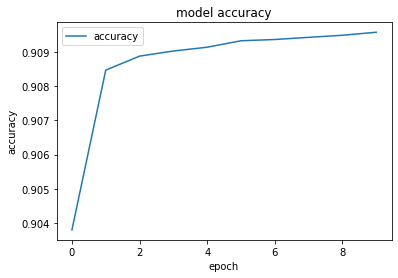

In [ ]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy', 'test'], loc='upper left')


dict_keys(['loss', 'accuracy'])


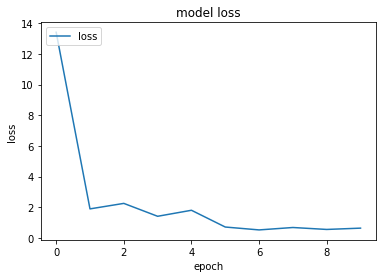

In [ ]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'test'], loc='upper left')
